# The Sparks Foundation

Intership Task
By Akhilesh Arora
Data Science and Business Analytics Intern at The Sparks Foundtion

# Score Prediction
In this notebook, we will build a linear regression model to predict scores based on no. of hours studied.

In [31]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
# Import dataframe 
datapath = 'C:/Users/Akhil/Documents/Python Project/Grip Project'
dataframe = pd.read_csv(datapath + r'/student_scores.csv')
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


In [22]:
#Description of Raw Data
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [21]:
print(dataframe.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


Text(0.5, 1.0, 'SCATTER PLOT')

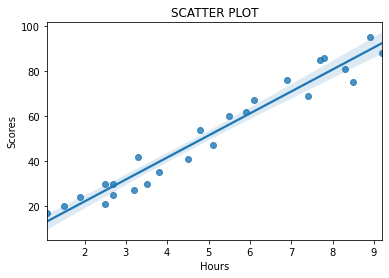

In [29]:
#scatterplot
sns.regplot(data = dataframe, x = "Hours", y = "Scores")
plt.title("SCATTER PLOT")


In [10]:
# creating dependent Variable
# Creating Independent Variable
X = dataframe.iloc[:, :-1].values  
Y = dataframe.iloc[:, 1].values  

In [11]:
# Split the dataset in training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# Train the model on the training set using LinearRegression
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,Y_train)

LinearRegression()

In [12]:
# Predict the test set results
Y_pred=ml.predict(X_test)
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


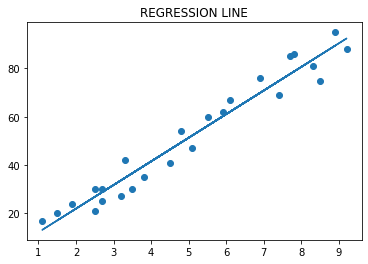

In [28]:
# Plotting the regression line
line = ml.coef_*X+ml.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.title("REGRESSION LINE")
plt.show()


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:
# You can also test with your own data
own_pred =ml.predict([[9.25]])
print("Number of Hours = 9.25")
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 92.91505723477056


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.4197278080276545


In [23]:
# Evaluating the model
from sklearn.metrics import r2_score
print("R Squared Score :",r2_score(Y_test,Y_pred))

R Squared Score : 0.9568211104435257
